Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 4</span>


In this exercise we performed MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units.
The results of the equilibrated* simulations are shown below.

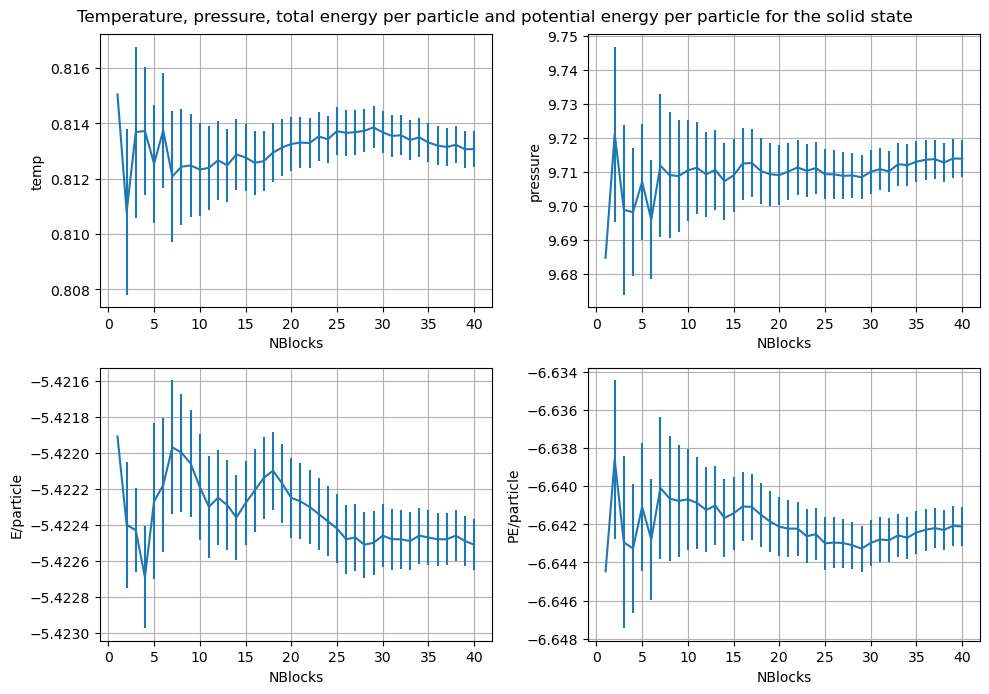

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def _plot(plt, filename, ylabel):
    x, flush, y, err_prog = np.loadtxt(filename, unpack=True)
    plt.errorbar(x, y, yerr=err_prog)
    plt.xlabel('NBlocks')
    plt.ylabel(ylabel)
    plt.grid(True)

general_title = "Temperature, pressure, total energy per particle and potential energy per particle for the "

plt.figure(figsize=(10, 10))
plt.suptitle(general_title + "solid state")
plt.subplot(3, 2, 1)
_plot(plt, "./OUTPUT/es_4/solid/temperature.dat", 'temp')

plt.subplot(3, 2, 2)
_plot(plt, "./OUTPUT/es_4/solid/pressure.dat", 'pressure')

plt.subplot(3, 2, 3)
_plot(plt, "./OUTPUT/es_4/solid/total_energy.dat", 'E/particle')

plt.subplot(3, 2, 4)
_plot(plt, "./OUTPUT/es_4/solid/potential_energy.dat", 'PE/particle')

plt.tight_layout()
plt.show()

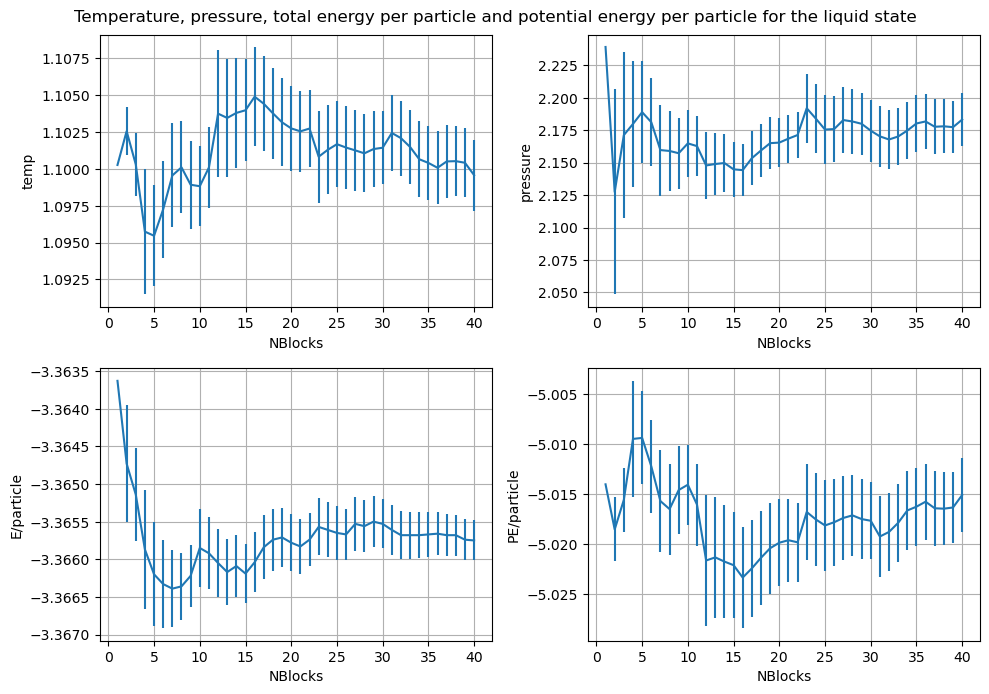

In [24]:
plt.figure(figsize=(10, 10))
plt.suptitle(general_title + "liquid state")

plt.subplot(3, 2, 1)
_plot(plt, "./OUTPUT/es_4/liquid/temperature.dat", 'temp')

plt.subplot(3, 2, 2)
_plot(plt, "./OUTPUT/es_4/liquid/pressure.dat", 'pressure')

plt.subplot(3, 2, 3)
_plot(plt, "./OUTPUT/es_4/liquid/total_energy.dat", 'E/particle')

plt.subplot(3, 2, 4)
_plot(plt, "./OUTPUT/es_4/liquid/potential_energy.dat", 'PE/particle')

plt.tight_layout()
plt.show()

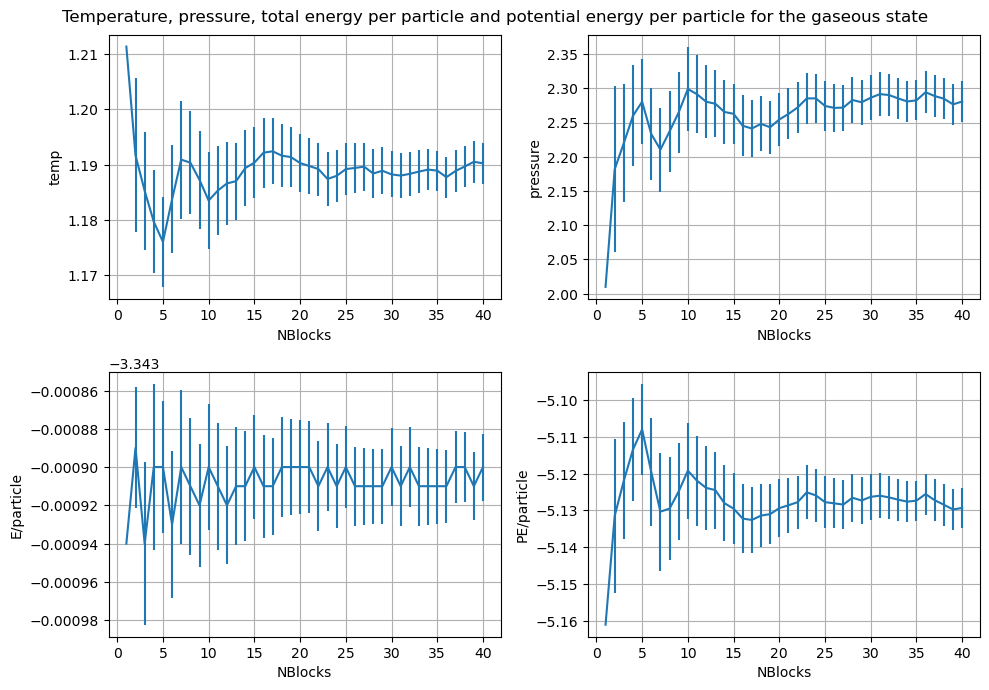

In [37]:
plt.figure(figsize=(10, 10))
plt.suptitle(general_title + "gaseous state")

plt.subplot(3, 2, 1)
_plot(plt, "./OUTPUT/es_4/gas/temperature.dat", 'temp')

plt.subplot(3, 2, 2)
_plot(plt, "./OUTPUT/es_4/gas/pressure.dat", 'pressure')

plt.subplot(3, 2, 3)
_plot(plt, "./OUTPUT/es_4/gas/total_energy.dat", 'E/particle')

plt.subplot(3, 2, 4)
_plot(plt, "./OUTPUT/es_4/gas/potential_energy.dat", 'PE/particle')

plt.tight_layout()
plt.show()

#### Note: Equilibration
To equilibrate the system from a fcc lattice configuration, the system was tested by adjusting the starting temperature, which is used to determine the velocity distribution. It is highly recommended to do the equilibration separately and generate equilibrated configurations to start the simulations, instead of using the fcc starting lattice, as the method I employed is computationally heavy and needs some fine tuning for each state (solid, liquid and gas).
The procedure, is carried out in the System::seek_temperature() function in System.cpp, and it consists of forcing the system near the required temperature by heating it up (changing its velocities by a constant factor) and fine tuning the system by initializing the velocities again when it's approaching the right state.

Below I show the trend of the temperature during this procedure.

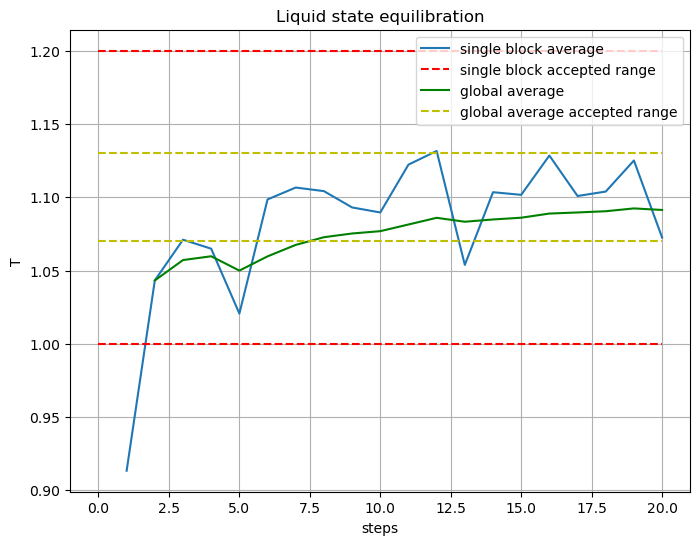

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
T, avg = np.loadtxt("./OUTPUT/es_4/liquid/seekT.dat", unpack=True)
x = np.linspace(1,len(T),len(T))
plt.plot(x, T, label="single block average")
plt.hlines(1.2, 0, len(x), colors='r', linestyles='dashed', label="single block accepted range")
plt.hlines(1.0, 0, len(x), colors='r', linestyles='dashed')
plt.plot(x, avg, color='g', label="global average")
plt.hlines(1.07, 0, len(x), colors='y', linestyles='dashed', label="global average accepted range")
plt.hlines(1.13, 0, len(x), colors='y', linestyles='dashed')
#plt.xlim(len(x)-100, len(x))
#plt.ylim(1.0, 1.2)
plt.title("Liquid state equilibration")
plt.xlabel('steps')
plt.ylabel('T')
plt.legend()
plt.grid(True)

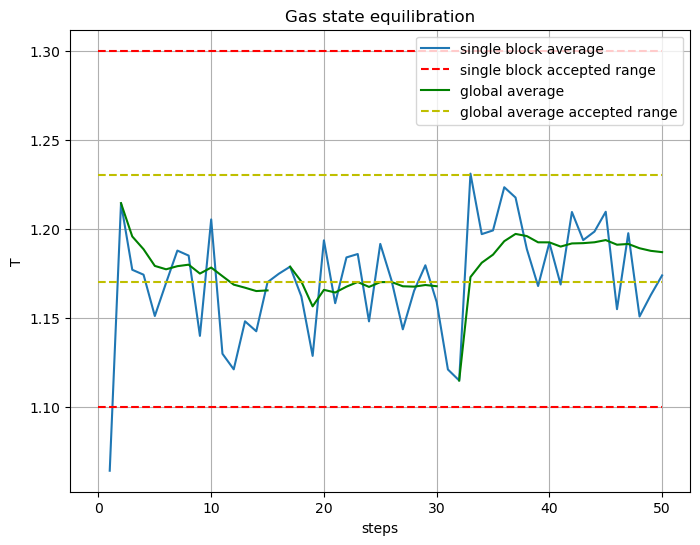

In [52]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
T, avg = np.loadtxt("./OUTPUT/es_4/gas/seekT.dat", unpack=True)
x = np.linspace(1,len(T),len(T))
plt.plot(x, T, label="single block average")
plt.hlines(1.3, 0, len(x), colors='r', linestyles='dashed', label="single block accepted range")
plt.hlines(1.1, 0, len(x), colors='r', linestyles='dashed')
plt.plot(x, avg, color='g', label="global average")
plt.hlines(1.17, 0, len(x), colors='y', linestyles='dashed', label="global average accepted range")
plt.hlines(1.23, 0, len(x), colors='y', linestyles='dashed')
#plt.xlim(len(x)-100, len(x))
#plt.ylim(1.0, 1.2)
plt.title("Gas state equilibration")
plt.xlabel('steps')
plt.ylabel('T')
plt.legend()
plt.grid(True)

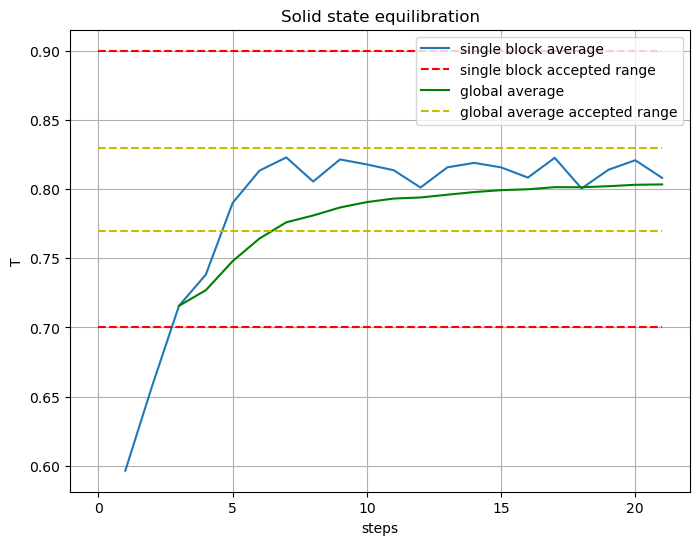

In [51]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
T, avg = np.loadtxt("./OUTPUT/es_4/solid/seekT.dat", unpack=True)
x = np.linspace(1,len(T),len(T))
plt.plot(x, T, label="single block average")
plt.hlines(0.9, 0, len(x), colors='r', linestyles='dashed', label="single block accepted range")
plt.hlines(0.7, 0, len(x), colors='r', linestyles='dashed')
plt.plot(x, avg, color='g', label="global average")
plt.hlines(0.77, 0, len(x), colors='y', linestyles='dashed', label="global average accepted range")
plt.hlines(0.83, 0, len(x), colors='y', linestyles='dashed')
#plt.xlim(len(x)-100, len(x))
#plt.ylim(1.0, 1.2)
plt.title("Solid state equilibration")
plt.xlabel('steps')
plt.ylabel('T')
plt.legend()
plt.grid(True)